# Quiz

- 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다.  
  현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때,  
  아래 각 문항에 대한 코드를 작성하시오.

주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [6]:
dataset = pd.read_csv('QuizData.csv')
dataset[:5] # dataset.head() 와 동일

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [7]:
X = dataset.iloc[:, :-1].values # 결혼식 참석 인원 total (종속 변수)
y = dataset.iloc[:, -1].values # 식수 인원 reception (독립 변수)

In [8]:
X[:5], y[:5] # 5개의 데이터만 출력

(array([[118],
        [253],
        [320],
        [ 94],
        [155]], dtype=int64),
 array([ 62, 148, 201,  80,  92], dtype=int64))

In [9]:
X.shape, y.shape # 행렬 구조의 형태

((20, 1), (20,))

### 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. (비율은 75 : 25)

(단, random_state = 0 으로 설정)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 3) 훈련 세트를 이용하여 단순 선형 회귀(Simple Linear Regression) 모델을 생성하시오.

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

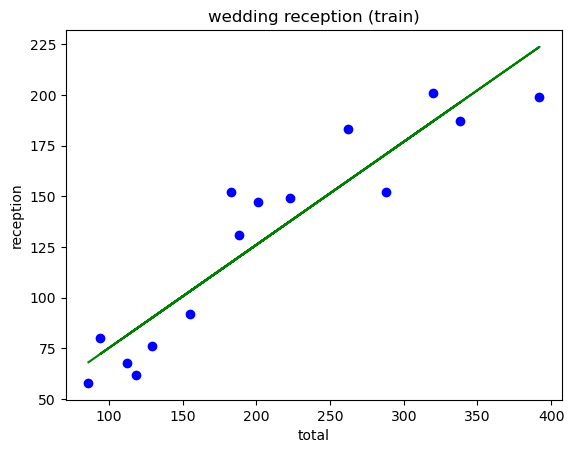

In [15]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

<function matplotlib.pyplot.show(close=None, block=None)>

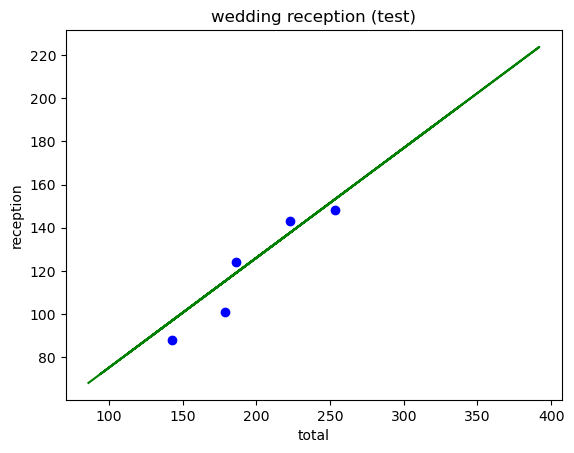

In [17]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show

### 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [19]:
reg.score(X_train, y_train)

0.8707088403321211

In [20]:
reg.score(X_test, y_test)

0.8634953212566615

### 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [22]:
X[:5] # 2차원 배열인것을 확인함

array([[118],
       [253],
       [320],
       [ 94],
       [155]], dtype=int64)

In [43]:
total = 300 # 결혼식 참석 인원
y_pred = reg.predict([[total]])

print(f'결혼식 참석 인원 {total} 명에 대한 예상 식수 인원은 {np.around(y_pred[0]).astype(int)} 명입니다.')

# 배열형으로 나오는 것을 없애기 위해 y_pred[0]식으로 수정
# np.around를 통해 반올림 실행
# astype(int)를 통해 실수형을 정수형으로 변환
# 원하는 출력값 : "결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명입니다."

결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명입니다.
